> $2347118$<br/>
$Hitesh$ $Salimath$

# Data Preprocessing:

In [ ]:
# Importing necessary libraries
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
# Optional Data Augmentation using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class labels to one-hot encoding
train_labels_onehot = to_categorical(train_labels, 10)
test_labels_onehot = to_categorical(test_labels, 10)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)


170498071/170498071 [==============================] - 2s 0us/step


# Network Architecture Design:

# Activation Functions:

In [ ]:
from tensorflow.keras import layers, models

# Create a CNN model
model = models.Sequential()

# First Conv Layer with 32 filters and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Conv Layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Conv Layer with 128 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening and Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Output Layer for 10 classes with softmax
model.add(layers.Dense(10, activation='softmax'))

# Model Summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

***Question: Explain why you selected a particular activation function and its role in backpropagation.***

***Answer:***

  - **ReLU:** Chosen because it is computationally efficient and helps to avoid vanishing gradient problems, making it suitable for deep networks.
  - **Softmax:** Used in the output layer to convert logits into probabilities for multi-class classification.

# Loss Function and Optimizer:

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Optionally, you can use a learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate if validation accuracy plateaus
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

***Question: How does the choice of optimizer and learning rate influence the convergence of the network? How would you adjust the learning rate if the model is not converging properly?***

***Answer:***

  - **Adam Optimizer:** Combines advantages of SGD and RMSprop, adapting the learning rate for each parameter. It's widely used because it converges quickly with minimal tuning.
  - **Learning Rate:** If the model is not converging, try reducing the learning rate, which will allow the model to make smaller steps during gradient descent.

# Training the Model:

In [ ]:
# Fit the model
history = model.fit(train_images, train_labels_onehot, epochs=50, batch_size=64,
                    validation_data=(test_images, test_labels_onehot),
                    callbacks=[lr_scheduler])

Epoch 1/50
782/782 [==============================] - 10s 12ms/step - loss: 1.5852 - accuracy: 0.4203 - val_loss: 1.2653 - val_accuracy: 0.5479 - lr: 0.0010
Epoch 2/50
782/782 [==============================] - 9s 11ms/step - loss: 1.1897 - accuracy: 0.5794 - val_loss: 1.1344 - val_accuracy: 0.5953 - lr: 0.0010
Epoch 3/50
782/782 [==============================] - 9s 12ms/step - loss: 1.0325 - accuracy: 0.6377 - val_loss: 1.0625 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 0.9234 - accuracy: 0.6780 - val_loss: 0.9402 - val_accuracy: 0.6744 - lr: 0.0010
Epoch 5/50
782/782 [==============================] - 9s 11ms/step - loss: 0.8386 - accuracy: 0.7073 - val_loss: 0.8883 - val_accuracy: 0.6957 - lr: 0.0010
Epoch 6/50
782/782 [==============================] - 9s 11ms/step - loss: 0.7795 - accuracy: 0.7278 - val_loss: 0.9047 - val_accuracy: 0.6856 - lr: 0.0010
Epoch 7/50
782/782 [==============================] - 9s 11ms/s

***Question: How does backpropagation update the weights in each layer, and what role does the learning rate play in this process?***

***Answer:*** Backpropagation computes the gradient of the loss with respect to each weight and updates the weights by subtracting the gradient multiplied by the learning rate. The learning rate controls how large each update step is. If the learning rate is too high, the model may oscillate; if too low, training may be very slow.

# Model Evaluation:

313/313 - 1s - loss: 1.6097 - accuracy: 0.7333 - 1s/epoch - 3ms/step
Test accuracy: 0.7333


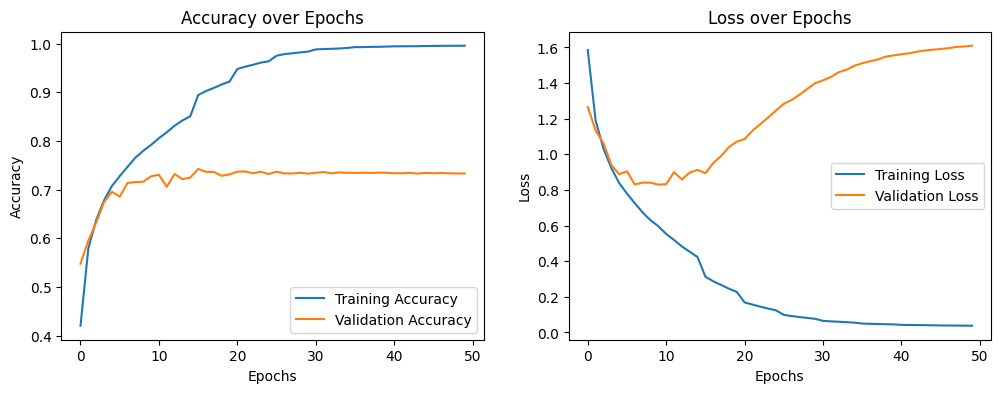

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels_onehot, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy over Epochs')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss over Epochs')

    plt.show()

plot_training_history(history)

313/313 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      1000
           1       0.84      0.85      0.84      1000
           2       0.63      0.63      0.63      1000
           3       0.56      0.57      0.56      1000
           4       0.67      0.69      0.68      1000
           5       0.65      0.63      0.64      1000
           6       0.78      0.81      0.79      1000
           7       0.78      0.76      0.77      1000
           8       0.83      0.83      0.83      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
 [[765  18  52  22  25  12  11   7  57  31]
 [ 21 847   9   7   6   4   8   6  24  68]
 [ 64   5 633  56  80  50  66  29  11   6]
 [ 17   5  69 

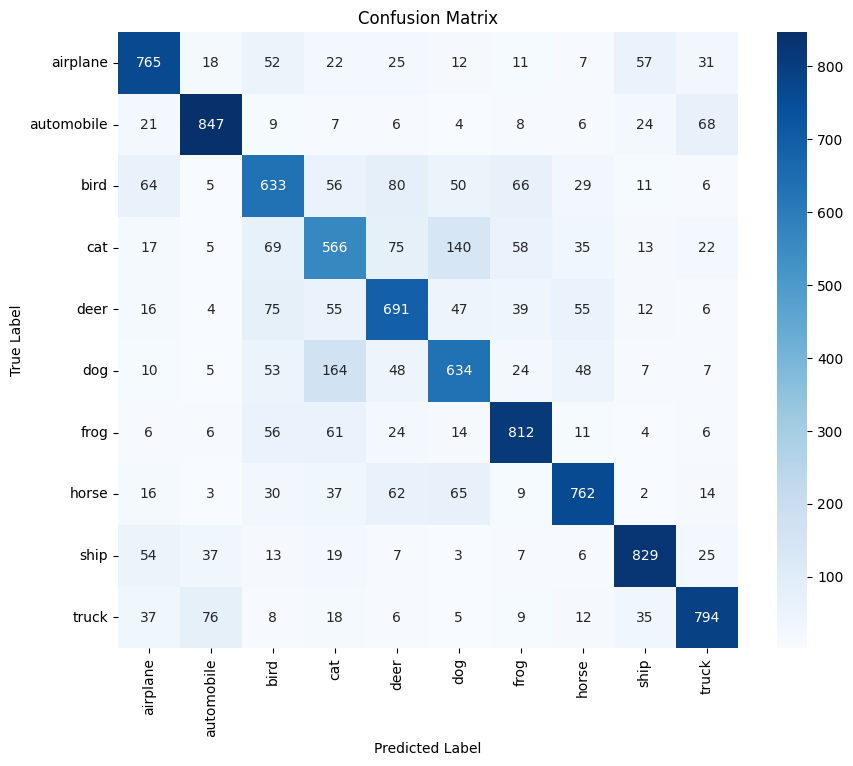

In [ ]:
# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels_onehot, axis=1)

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'],
            yticklabels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

***Question: How can you further improve model performance if the accuracy is low?***

***Answer:***

Apply techniques like data augmentation to make the model more robust.
Adjust the learning rate or use learning rate scheduling to avoid overfitting or underfitting.
Add more layers, filters, or try regularization techniques like dropout or L2 regularization.

# Optimization Strategies:

1.  ***Early Stopping to Prevent Overfitting:***
  -   **What it does:** Early stopping is a technique where training is halted if the model's performance on the validation set does not improve after a certain number of epochs. This helps prevent overfitting, where the model performs well on training data but poorly on unseen data.
  -   **How it helps:** By stopping training early, you avoid overfitting and save computational resources, ensuring the model generalizes better to new data.

2. ***Learning Rate Scheduling for Smoother Convergence:***

    - **What it does:** Learning rate scheduling automatically reduces the learning rate when the model's performance plateaus. This allows for larger updates early on and finer updates later, leading to smoother and more efficient convergence.
    - **How it helps:** If the learning rate is too high throughout training, it may lead to oscillations, and if it's too low, convergence will be slow. Scheduling adjusts it dynamically based on model performance.

3. ***Weight Initialization Techniques to Ensure Efficient Learning:***

  - **What it does:** Weight initialization refers to the strategy used to assign the initial weights of a neural network before training begins. Good initialization avoids issues like vanishing/exploding gradients.
  - ***Common techniques:***
    - **Xavier/Glorot Initialization:** Ensures that the weights are balanced to maintain stable gradients throughout the network. Used in networks with sigmoid or tanh activations.
    - **He Initialization:** Specialized for ReLU and its variants, it assigns larger initial weights to counteract the dying ReLU problem.


***Q. Why is Weight Initialization Important, and How Does It Impact Convergence***
  
  - Weight initialization is crucial because it directly influences how fast the model converges during training, and it ensures the gradients flowing through the network remain stable.

  - **Avoids Vanishing/Exploding Gradients:** Poor initialization can cause gradients to either vanish (become very small) or explode (become excessively large), preventing the model from learning effectively. For example, initializing all weights to the same value (like zero) can cause neurons to behave identically, leading to ineffective learning.

**Impact on Convergence:**

  - **Xavier Initialization:** Works well with activations like sigmoid and tanh, ensuring that the variance of activations remains consistent throughout the network.
  - **He Initialization:** Is better suited for ReLU activations, which are common in deep networks. It helps prevent dead neurons by starting with larger weights, ensuring that neurons are activated and gradients flow smoothly.

In summary, proper weight initialization prevents gradients from diminishing or exploding, helping the model converge faster and more reliably. It ensures that the network starts with weights that allow effective learning from the outset.

# Report:

1. ***Network Architecture and Justifications***

  - **Architecture of the Network:**
    - **Input Shape:** (32, 32, 3) (representing 32x32 RGB color images).
    - **Conv2D Layers:**
      - The first Conv2D layer has 32 filters with a 3x3 kernel, followed by a MaxPooling2D layer to downsample the input.
      - The second Conv2D layer has 64 filters and is also followed by a MaxPooling2D layer.
      - The third Conv2D layer has 128 filters, also followed by a MaxPooling2D layer.

    - **Dense Layers:**
      - After flattening the data, the network includes a fully connected (dense) layer with 128 neurons, followed by an output layer with 10 neurons (one for each class) and a softmax activation function.

  - **Justifications for the Architecture:**
    - **Convolutional Layers:** The Conv2D layers were chosen to extract features from the images. Increasing the number of filters at each layer helps capture more complex features as the image passes through the layers.
    - **MaxPooling Layers:** MaxPooling reduces the spatial dimensions of the feature maps, preventing overfitting and reducing computational complexity.
    - **Dense Layers:** After the convolutional layers extract features, dense layers combine them into class predictions. The 128-neuron dense layer allows for sufficient learning capacity without making the network too large or prone to overfitting.
    - **Softmax Output Layer:** Used for multi-class classification with 10 classes. The softmax activation outputs a probability distribution across the 10 classes.

2. ***Training and Test Accuracy with Relevant Plots***
**Training Results:**
  - Accuracy: 0.7333 (73.33%)
  
**Loss and Accuracy Plot:**

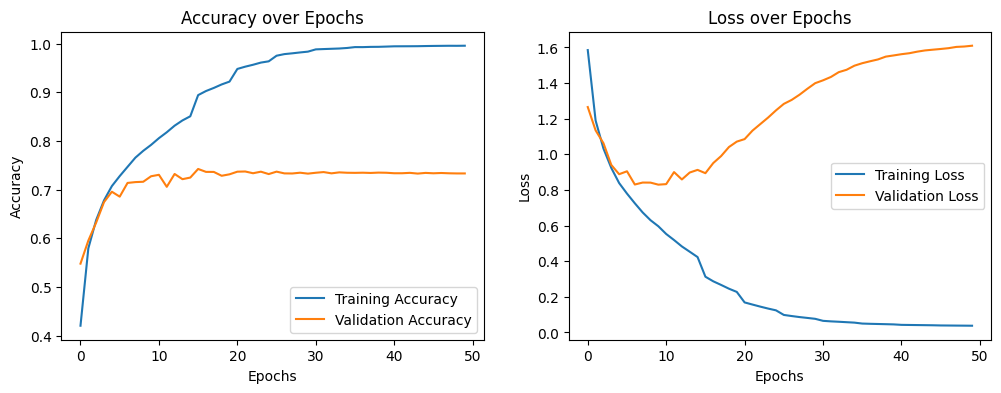



3. ***Hyperparameter Values Used:***
  - **Learning Rate:** Default value for Adam optimizer (0.001), which automatically adjusts the learning rate during training.
  - **Batch Size:** 64
  - **Number of Epochs:** 50
  - **Optimizer:** Adam
  - **Loss Function:** Categorical Cross-Entropy (suitable for multi-class classification).

4. ***Challenges Faced and How They Were Addressed:***
  - **Challenge 1: Overfitting**
    - **How It Was Addressed:**
      - Early Stopping was used to prevent the model from training too long and overfitting on the training data.
      - Data Augmentation could also be applied to reduce overfitting by artificially increasing the training dataset size with transformations like rotations or flips.
  - **Challenge 2: Model Convergence**
    - **How It Was Addressed:**
      - Learning Rate Scheduling was used to help the model converge more smoothly. The learning rate was reduced when the validation performance plateaued.
      - Weight Initialization (He initialization) was used to ensure efficient learning in the deep network with ReLU activations.
  - **Challenge 3: Computational Resources**
    - **How It Was Addressed:**
      - A smaller batch size (64) was used to avoid memory overload.
      - MaxPooling2D was utilized to reduce feature map dimensions and the computational load.

5. ***Performance Metrics:***
  - **Final Test Accuracy**:
    - **Test Accuracy:** 73.33%
  - **Precision, Recall, F1-Score, and Confusion Matrix:**

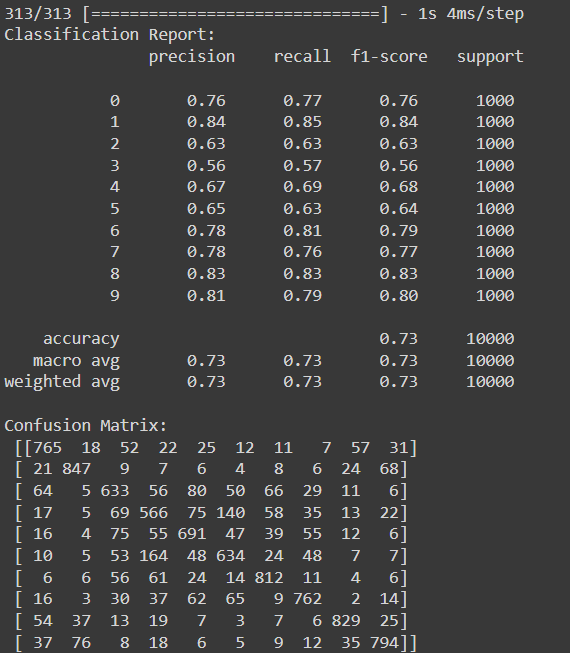